# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    print(df.ID[0])
    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

AE000041196


In [2]:
% matplotlib notebook

In [3]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

### In this assignment,  
1. I changed the type of the column Date to datttime object.
2. I solved the leap days problem by illiminating the 29 th day of february.
3. I splited the data to have data between 2005 - 2014 and data of 2015
4. I grouped the data between 2005-2014 to get the series has min record of temporator and max record of temperator.
5. I aggregated the data of 2015 by day getting two series of max and min temperatur record.
6. extracted the points where the record of 2015 broke the record of the grouped serie 2005-2014
7. plotted the lines of max and min temperature record, and overlay a scatter of the broken record  by 2015 .

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [6]:
data.columns

Index(['ID', 'Date', 'Element', 'Data_Value'], dtype='object')

In [7]:
data=data[~(data['Date'].str.endswith(r'02-29'))]
data.shape

(165002, 4)

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165002 entries, 0 to 165084
Data columns (total 4 columns):
ID            165002 non-null object
Date          165002 non-null datetime64[ns]
Element       165002 non-null object
Data_Value    165002 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.3+ MB


In [9]:
data['day']=data.Date.dt.day
data['month'] = data.Date.dt.month

In [10]:
data.head(10)

,ID,Date,Element,Data_Value,day,month
0,USW00094889,2014-11-12,TMAX,22,12,11
1,USC00208972,2009-04-29,TMIN,56,29,4
2,USC00200032,2008-05-26,TMAX,278,26,5
3,USC00205563,2005-11-11,TMAX,139,11,11
4,USC00200230,2014-02-27,TMAX,-106,27,2
5,USW00014833,2010-10-01,TMAX,194,1,10
6,USC00207308,2010-06-29,TMIN,144,29,6
7,USC00203712,2005-10-04,TMAX,289,4,10
8,USW00004848,2007-12-14,TMIN,-16,14,12
9,USC00200220,2011-04-21,TMAX,72,21,4


In [11]:
data_2015 = data[data.Date.dt.year==2015]

In [12]:
data_2015_max=data_2015.groupby(['month','day']).agg({'Data_Value':max})
data_2015_min=data_2015.groupby(['month','day']).agg({'Data_Value':min})

In [13]:
data_2005_2014 = data[data.Date.dt.year != 2015]

In [14]:
data_max_record = data_2005_2014.groupby(['month','day']).agg({'Data_Value' : 'max'})
data_min_record = data_2005_2014.groupby(['month','day']).agg({'Data_Value' : 'min'})

In [15]:
# before we go further we verify the shape of the aggregated data of 2015 and the data between 2005-2014
print('shape of data_2005_2014 aggregated by day getting the max is :',data_max_record.shape,'shape of aggregated data by day getting the max 2015 is ',data_2015_max.shape)
print('shape of data_2005_2014 aggregated by day getting the min is :',data_min_record.shape,'shape of aggregated data by day getting the min 2015 is ',data_2015_min.shape)

shape of data_2005_2014 aggregated by day getting the max is : (365, 1) shape of aggregated data by day getting the max 2015 is  (365, 1)
shape of data_2005_2014 aggregated by day getting the min is : (365, 1) shape of aggregated data by day getting the min 2015 is  (365, 1)


In [16]:
## How to get those points out :)
import numpy as np
max_record = np.where(data_max_record.Data_Value < data_2015_max.Data_Value,data_2015_max.Data_Value,np.nan)
min_record = np.where(data_min_record.Data_Value > data_2015_min.Data_Value,data_2015_min.Data_Value,np.nan)

In [17]:
# I get the not nan values and store them with the position 
## get the max record of 2015 that broke the 2005-2014
df_max=pd.DataFrame(max_record,columns=['Data_Value'])
df_max['indice'] = df_max.index
df_max.dropna(subset=['Data_Value'],inplace=True)

### get min records of 2015 that broke the records of 2005-2014

df_min=pd.DataFrame(min_record,columns=['Data_Value'])
df_min['indice'] = df_min.index
df_min.dropna(subset=['Data_Value'],inplace=True)

In [18]:
df_max.head()

,Data_Value,indice
39,83.0,39
106,278.0,106
126,306.0,126
127,333.0,127
130,306.0,130


<IPython.core.display.Javascript object>


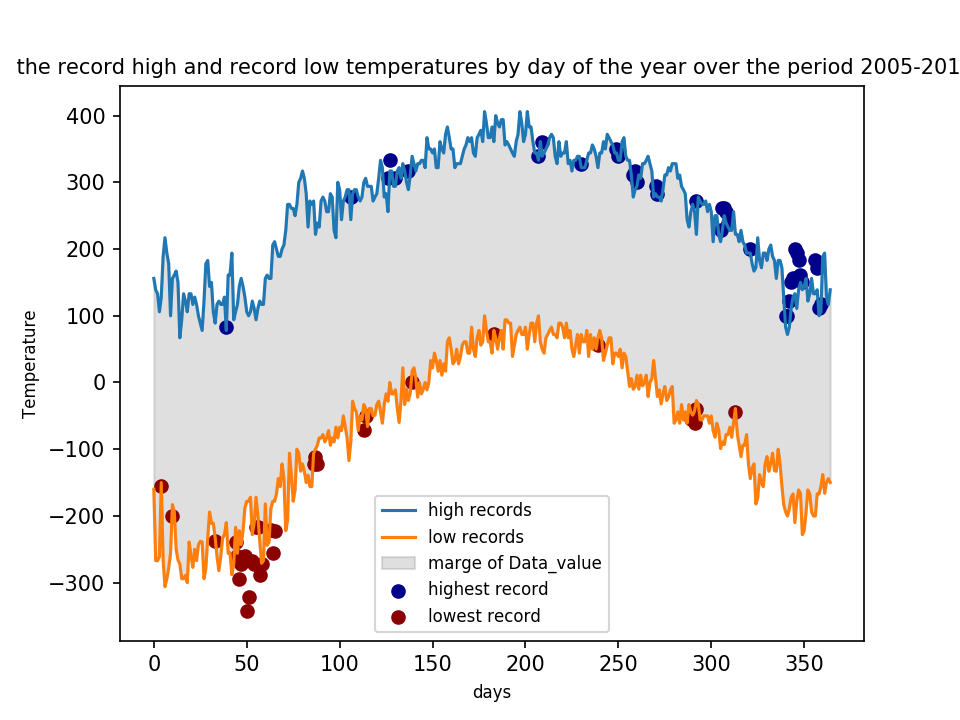

In [29]:
fig = plt.figure()

plt.plot(list(data_max_record.Data_Value))
plt.plot(list(data_min_record.Data_Value))
#plt.plot(data_max_record.Data_Value,'-',data_min_record.Data_Value,'-')
plt.xlabel('days',fontsize=8)
plt.ylabel('Temperature',fontsize=8)
plt.title(' the record high and record low temperatures by day of the year over the period 2005-2014',fontsize=10)
plt.gca().fill_between(range(len(data_max_record.Data_Value)),data_max_record.Data_Value,data_min_record.Data_Value,
                      color='grey',alpha = 0.25)
plt.scatter(list(df_max.indice), list(df_max.Data_Value),color='darkblue',label='max record')
plt.scatter(list(df_min.indice), list(df_min.Data_Value),color='darkred',label = 'min_record')
plt.legend(['high records','low records','marge of Data_value','highest record','lowest record'],fontsize=8)

fig.savefig('assignment2.jpg')

